![](https://i.imgur.com/0AUxkXt.png)

# SF Salaries Exercise 

Explore San Francisco city employee salary data.

## Overview

One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.



Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

## Resourses

[Pandas API Reference](https://pandas.pydata.org/pandas-docs/stable/api.html)

[NumPy Reference](https://docs.scipy.org/doc/numpy/reference/)

[Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)


In [324]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import libraries**

In [0]:
import pandas as pd
import seaborn as sns

**Read `Salaries.csv` as a dataframe called `sal`.**

In [0]:
# link = "https://s3-ap-southeast-1.amazonaws.com/intro-to-ml-minhdh/Salaries.csv"
sal = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Salaries.csv")

**Check the head of the DataFrame.**

In [327]:
# lay data tu head
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**Use the .info() method to find out how many entries there are.**

In [328]:
# summary of data
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**What is the average BasePay ?**

Keyword: [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)

In [329]:
# gia tri trung binh cua BasePay
sal.BasePay.mean()
# sal['BasePay'].mean()

66325.44884050643

**What is the lowest and highest amount of BasePay?**

Keyword: 
[min](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html) , 
[max](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)

In [330]:
# gia tri min cua BasePay
sal.BasePay.min()

-166.01

In [331]:
sal.BasePay.max()

319275.01

**How about OvertimePay in the dataset? What is the average, lowest, highest amount?**

In [332]:
# gop lai thanh 1 list de show
[sal.OvertimePay.mean(), sal.OvertimePay.min(), sal.OvertimePay.max()]

[5066.059886444622, -0.01, 245131.88]

**What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).**

In [333]:
# show cac row thoa man dieu kien
sal.JobTitle[sal.EmployeeName == 'JOSEPH DRISCOLL']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [334]:
# Now try to select Employees who have name "GARY JIMENEZ"
# Your code here
sal[sal.EmployeeName == 'GARY JIMENEZ']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN


**How much does JOSEPH DRISCOLL make (including benefits)?**

In [335]:
# show cac row thoa man dieu kien
sal.TotalPayBenefits[sal.EmployeeName == 'GARY JIMENEZ']

1    538909.28
Name: TotalPayBenefits, dtype: float64

**What is the name of highest paid person (including benefits)?**

In [336]:
# show cac row thoa man dieu kien
sal.EmployeeName[sal.TotalPayBenefits == sal.TotalPayBenefits.max()]

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

**What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [337]:
sal.EmployeeName[sal.TotalPayBenefits == sal.TotalPayBenefits.min()]

148653    Joe Lopez
Name: EmployeeName, dtype: object

**What was the average (mean) BasePay of all employees per year? (2011-2014) ?**
Keyword: _groupby_

In [338]:
sal.groupby('Year').BasePay.mean()

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

**How many unique job titles are there?**

Keyword: _unique, nunique_

In [339]:
# lay count unique va list unique
[sal.JobTitle.nunique(), sal.JobTitle.unique()]

[2159, array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
        'CAPTAIN III (POLICE DEPARTMENT)',
        'WIRE ROPE CABLE MAINTENANCE MECHANIC', ..., 'Conversion',
        'Cashier 3', 'Not provided'], dtype=object)]

**What are the top 5 most common jobs?**

Keyword: *value_counts*

In [340]:
# value_counts descending -> head 5 = top 5
sal.JobTitle.value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

**How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)**

In [341]:
# sum True value = so row thoa man dieu dien
sum(sal[sal['Year'] == 2013]['JobTitle'].value_counts() == 1)

202

**How many people have the word Chief in their job title?**

In [0]:
# Ham don gian
def chief_exist(title):
    if 'chief' in title.lower():
        return True
    else:
        return False

In [343]:
# truyen function de kiem tra dieu kien
sum(sal['JobTitle'].apply(lambda x:chief_exist(x)))

627

## Data Visualization

**Implement seaborn's countplot with x='Year'**

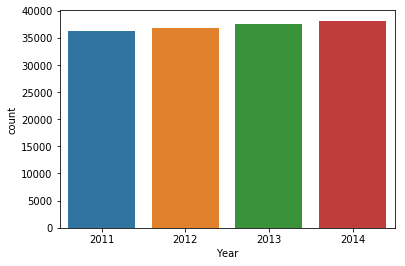

In [344]:

#Implement seaborn's countplot with x='Year'
sns.countplot(x='Year', data = sal)

**Implement seaborn's distplot for BasePay of Year 2011**

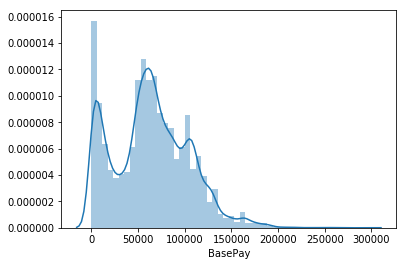

In [345]:
sal_2011 = sal[sal.Year == 2011]
#Implement seaborn's distplot for BasePay of Year 2011
sns.distplot(sal_2011.BasePay)

**How about other Year**

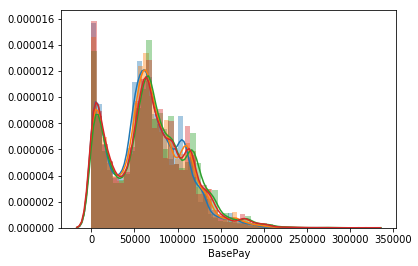

In [346]:
#other Year
sal_2011 = sal[sal.Year == 2011]
sal_2012 = sal[sal.Year == 2012]
sal_2013 = sal[sal.Year == 2013]
sal_2014 = sal[sal.Year == 2014]
sns.distplot(sal_2011.BasePay.dropna())
sns.distplot(sal_2012.BasePay.dropna())
sns.distplot(sal_2013.BasePay.dropna())
sns.distplot(sal_2014.BasePay.dropna())

## Bonus

**Visualize top 5 Jobs with BasePay, Benefits and OvertimePay**

Keyword: *index, isin, groupby, mean, plot*

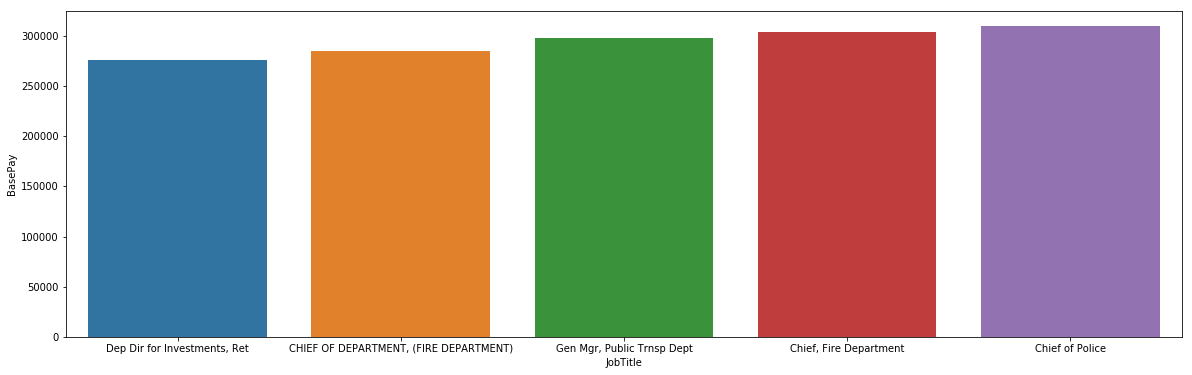

In [347]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 6))
#get top 5 mean theo moi loai
mean_by_job = sal.groupby('JobTitle').mean()
top5_base_pay = mean_by_job[np.isfinite(mean_by_job['BasePay'])].sort_values('BasePay').tail(5)
top5_base_pay.reset_index(inplace=True)
top5_benefits = mean_by_job[np.isfinite(mean_by_job['Benefits'])].sort_values('Benefits').tail(5)
top5_benefits.reset_index(inplace=True)
top5_overtime_pay = mean_by_job[np.isfinite(mean_by_job['OvertimePay'])].sort_values('OvertimePay').tail(5)
top5_overtime_pay.reset_index(inplace=True)

#ve do thi
sns.barplot(y='BasePay', x='JobTitle', data=top5_base_pay)



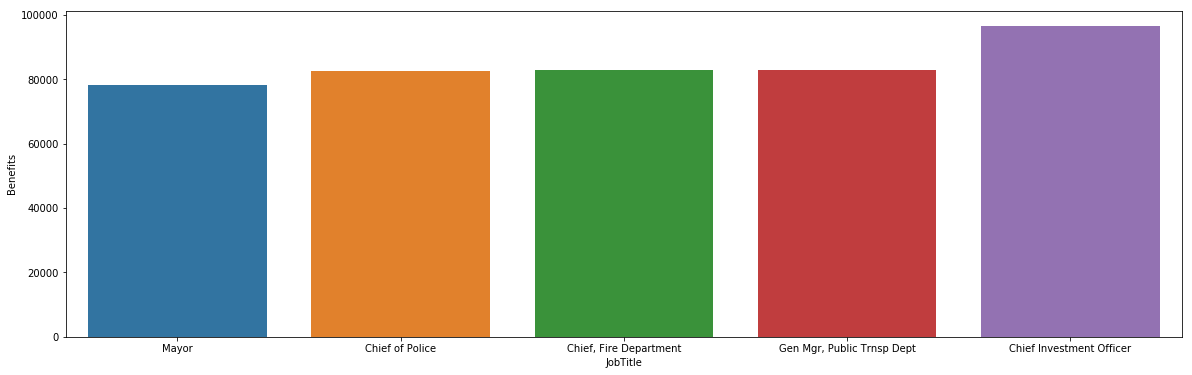

In [348]:
%matplotlib inline
plt.figure(figsize=(20, 6))
sns.barplot(y='Benefits', x='JobTitle', data=top5_benefits)


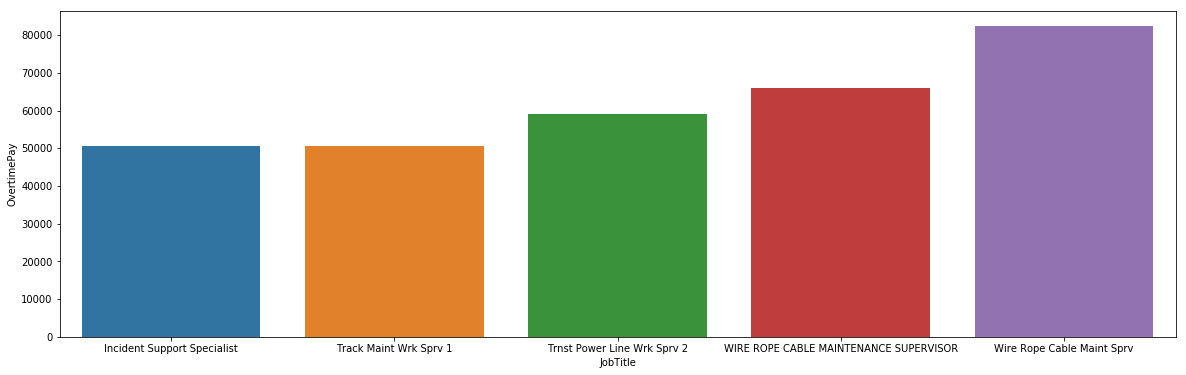

In [349]:
%matplotlib inline
plt.figure(figsize=(20, 6))
sns.barplot(y='OvertimePay', x='JobTitle', data=top5_overtime_pay)

** **bold text**Fun Fact: Is there a correlation between length of the Job Title string and Salary?**

*Hint: corr()*

In [350]:
sal['JTLength'] = [len(s) for s in sal.JobTitle]
sal[['JTLength', 'TotalPayBenefits']].corr()

,JTLength,TotalPayBenefits
JTLength,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000


# Great Job!